# Scientific Computing with Jupyter

### *Interactivity, Exploration & Narrative*

#### Oliver Evans

September 8th, 2017

In [1]:
from IPython import display
%matplotlib inline

# What is Jupyter?

- Interactive web interface for Python, Julia, R, etc ...

- Run locally or remotely

# A bit of background

Fernando Perez created IPython in 2001 during his Ph.D
![fperez](img/fperez.png)

Shreyas Cholia works at NERSC at Berkeley Lab.

![shreyas](https://openmsi.nersc.gov/site_media/openmsi/images/people/ShreyasCholia.jpg)

![nersc](https://6lli539m39y3hpkelqsm3c2fg-wpengine.netdna-ssl.com/wp-content/uploads/2016/02/cori3.jpg)

IPython (2001) | Jupyter (2014)
---|---
![ipython](img/ipython.png) | ![jupyter](img/jupyter.png)

# Why is it useful for scientific comuting?

- Reusable code cells for instant feedback during development

- Inline visualizations, tables & widgets for understanding & exploring data

- Web interface makes computations client-independent

- Markdown and $\LaTeX$ support in notebooks for communicating complex ideas

- Support for multiple languages

# Demo!

# Inline Visualizations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

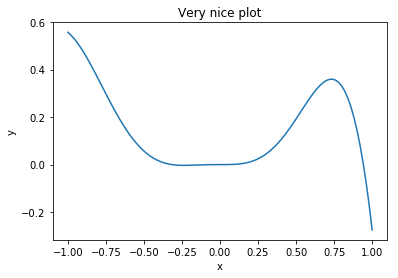

In [21]:
x = np.linspace(-1,1, 101)
y = x ** 3 * (np.sin(3*x) + np.cos(2*x))

plt.plot(x, y)
plt.title("Very nice plot")
plt.xlabel("x")
plt.ylabel("y")

In [4]:
n, m = 10, 5
df = pd.DataFrame(np.random.rand(n, m), columns=['Column #{}'.format(i+1) for i in range(m)])
df

,Column #1,Column #2,Column #3,Column #4,Column #5
0,0.783000,0.846837,0.185382,0.488941,0.593831
1,0.467015,0.289605,0.906583,0.635872,0.801360
2,0.774404,0.350809,0.422430,0.505004,0.628055
3,0.952895,0.052972,0.715152,0.200178,0.950521
4,0.360948,0.681392,0.939970,0.338928,0.620086
5,0.007466,0.710955,0.312737,0.730648,0.274907
6,0.998463,0.340549,0.296254,0.655689,0.539649
7,0.650003,0.339716,0.516167,0.626468,0.933536
8,0.922916,0.925732,0.343091,0.513728,0.217855
9,0.734328,0.134373,0.717812,0.776148,0.154421


# Interactive Widgets

In [22]:
import bqplot as bq
import bqplot.pyplot as bqp
import ipywidgets as ipw

In [23]:
def lj(r, sig, eps):
    return 4*eps * ((sig/r) ** 12 - (sig/r) ** 6)

In [24]:
ipw.interact(lj, r=(0.,10.), sig=(1.,2.), eps=(0., 10.));

A Jupyter Widget

In [25]:
r = np.linspace(0,5,1001)[100:]
sig = 1
eps = 1

In [26]:
xs = bq.LinearScale(min=0, max=5)
ys = bq.LinearScale(min=-5, max=5)
line = bq.Lines(x=r, y=lj(r, sig, eps), scales={'x': xs, 'y': ys}, colors=['red'])
xax = bq.Axis(scale=xs, label='r', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='LJ', grid_lines='solid')
fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=500)

In [27]:
def update_fig(sig, eps):
    r = np.linspace(0,5,101)[1:]
    y = lj(r, sig, eps)
    r = r[y<=10]
    y = y[y<=10]
    line.x = r
    line.y = y

In [30]:
fig

A Jupyter Widget

In [31]:
ipw.interact(update_fig, sig=(1., 2.), eps=(1.,10.));

A Jupyter Widget

# 3D + Domain-specific visualizations

In [32]:
import ipyvolume as ipv

In [33]:
import numpy as np
import ipyvolume
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipyvolume.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


/home/oliver/python/packages/ipyvolume/ipyvolume/serialize.py:58: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


A Jupyter Widget

In [34]:
import nglview
nglview.show_pdbid("3pqr")  # load "3pqr" from RCSB PDB and display viewer widget

A Jupyter Widget

# Markdown / Latex Cells

### This is a Markdown cell. 

- I can easily *italicize* and **bold** text.

- I can make tables!

A | B | C
---|---|---
1 | 2 | 3
4 | 5 | 6
7 | 8 | 9

- I can include arbitrary HTML!

<button>A button!</button>

- I can even include pictures and videos!

![fractal](img/Fractal-Mobius-Dragon-IFS-04.jpg)

<br />

<video width="800px" src="movie/mesfin.mp4" type="video/mp4" controls>
    Video not supported.
</video>

# Also: shell commands and IPython magics

In [16]:
ls

 FW.json                                   img/
'Jupyter for Scientific Computing.ipynb'   lammps_gen.py
'Kale Demo.ipynb'                          movie/
 LICENSE                                   notes.txt
 README.md                                 out.txt
 README.tex                                poster/
 Snippets.ipynb                            pyenvs/
 __pycache__/                              r_test.ipynb
 aux_widgets.py                            snippets.py
 droplet_workflow.py                       workflow_notebook.html
 example_workflow.py                       workflow_notebook.pdf
 fireworks/                                workflow_objects.py
 graphene_functions.py                     workflow_widgets.py
 graphene_monitor.py                       xeus_test.ipynb
 graphene_widget.py


In [17]:
!ls | grep ipynb

Jupyter for Scientific Computing.ipynb
Kale Demo.ipynb
Snippets.ipynb
r_test.ipynb
xeus_test.ipynb


In [18]:
%%bash
for i in `seq 3 10`
do
    echo $i
done

3
4
5
6
7
8
9
10


In [19]:
%%time
for i in range(int(1e7)):
    3 + 2

CPU times: user 678 ms, sys: 1.11 ms, total: 679 ms
Wall time: 678 ms


# Other Demos:
- Other Kernels
- Conda env. manager *
- IPyParallel *
- JupyterHub *
- Graphene Widget
- Kale
- Dask *
- SciKit Learn *

# So Jupyter is pretty cool . . .

- Interactivity for rapid exploration

- Utilize HPC resources

- Reproducible & Shareable

- Web interface can be run from anywhere 